Initial Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Predictions:
Instance: [6.1 2.8 4.7 1.2]
Predicted Cluster Label: 1

Instance: [5.7 3.8 1.7 0.3]
Predicted Cluster Label: 0

Instance: [7.7 2.6 6.9 2.3]
Predicted Cluster Label: 2

Instance: [6.  2.9 4.5 1.5]
Predicted Cluster Label: 1

Instance: [6.8 2.8 4.8 1.4]
Predicted Cluster Label: 1

Instance: [5.4 3.4 1.5 0.4]
Predicted Cluster Label: 0

Instance: [5.6 2.9 3.6 1.3]
Predicted Cluster Label: 1

Instance: [6.9 3.1 5.1 2.3]
Pre

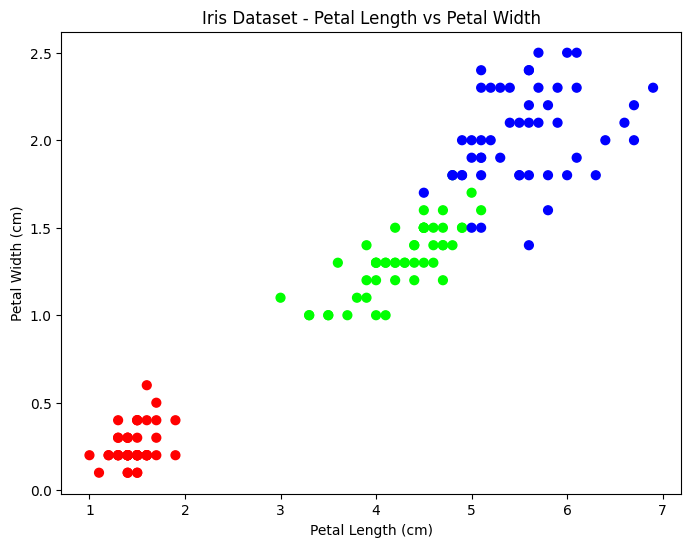

In [5]:
import numpy as np
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
path = "/content/drive/MyDrive/ML-LAB-MD/iris.csv"
data = pd.read_csv(path)

# Print the initial dataset
print("Initial Dataset:")
print(data.head())

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        # Compute the Euclidean distance between two points
        distance = scipy.spatial.distance.euclidean(X1, X2)
        return distance

    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(self.X_train)):
                # Calculate the distance between the test instance and all training instances
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for dist, j in d:
                # Get the class labels of the k nearest neighbors
                votes.append(self.y_train[j])
            # Determine the most common class label among the neighbors
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def score(self, X_test, y_test):
        # Calculate the accuracy of the predictions
        predictions = self.predict(X_test)
        accuracy = (predictions == y_test).sum() / len(y_test)
        return accuracy


k = 3  # Specify the value of k for the KNN algorithm
knn = KNN(k)
knn.fit(X_train, y_train)

# Predict on the test data
predictions = knn.predict(X_test)
print("Predictions:")
for instance, prediction in zip(X_test, predictions):
    print("Instance:", instance)
    print("Predicted Cluster Label:", prediction)
    print()


# Calculate the accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))

# Plotting the Iris dataset
plt.figure(figsize=(8, 6))
colormap = np.array(['red', 'lime', 'blue'])
plt.scatter(X[:, 2], X[:, 3], c=colormap[y], s=40)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Length vs Petal Width')
plt.show()
